In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
#import qtl.io

import scipy

from scipy import stats
import itertools

import re
import scanpy as sc
#import infercnvpy as cnv
from anndata import AnnData
import subprocess
import infercnvpy as cnv
import gseapy
import palettable
from matplotlib import colors
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from matplotlib import patches

In [2]:
MGH2389_bulk_cnvs_by_clone = pd.read_csv('MGH2389.seg_assignments.txt',sep='\t')
MGH2389_bulk_cnvs_by_clone


,Chromosome,Start.bp,End.bp,Cluster_assignment,total_CN,allelic_CN
0,1,43681006.0,43719755.0,0,2,"(1, 1)"
1,1,7913479.0,9011622.0,15,1,"(0, 1)"
2,1,196977715.0,197115419.0,4,2,"(0, 2)"
3,1,228494692.0,228565307.0,5,2,"(0, 2)"
4,1,182615961.0,196973882.0,4,2,"(0, 2)"
...,...,...,...,...,...,...
544,22,30822713.0,39358127.0,1,2,"(0, 2)"
545,22,22326286.0,23406196.0,1,2,"(0, 2)"
546,22,41553293.0,41625812.0,1,2,"(0, 2)"
547,22,41626223.0,42209840.0,1,2,"(0, 2)"


In [42]:
MGH2389_by_sample_segs

['2389_17.tsv',
 '2389_14.tsv',
 '2389_12.tsv',
 '2389_8.tsv',
 '2389_10.tsv',
 '2389_15.tsv',
 '2389_6b.tsv',
 '2389_1.tsv',
 '2389_6a.tsv',
 '2389_6.tsv',
 '2389_5.tsv',
 '2389_3.tsv',
 '2389_4.tsv',
 '2389_13.tsv',
 '2389_11.tsv',
 '2389_18.tsv',
 '2389_16.tsv',
 '2389_7.tsv',
 '2389_2.tsv',
 '2389_9.tsv']

In [89]:
MGH2389_by_sample_segs = os.listdir('by_sample_segs/patient2389/')
MGH2389_by_sample_dfs = []
path='by_sample_segs/patient2389/'

MGH2389_by_sample_segs_in_clone_order = [ '2389_4.tsv', '2389_2.tsv', '2389_8.tsv',
        '2389_10.tsv',  '2389_11.tsv','2389_12.tsv','2389_13.tsv','2389_15.tsv','2389_14.tsv',
        '2389_1.tsv','2389_3.tsv','2389_18.tsv','2389_16.tsv','2389_17.tsv','2389_7.tsv',
        '2389_9.tsv','2389_5.tsv', '2389_6b.tsv','2389_6a.tsv','2389_6.tsv']

MGH2389_by_sample_segs_only_single_cell = ['2389_3.tsv','2389_4.tsv',
                                           '2389_6.tsv','2389_10.tsv','2389_16.tsv']

for file in MGH2389_by_sample_segs_only_single_cell:
    df = pd.read_csv(path+file,sep='\t')
    sample_tsv = file.split('_')[1]
    sample_num = sample_tsv.split('.')[0]
    df['total_cn'] = df['A1.Seg.CN'] + df['A2.Seg.CN']
    df['sample'] = [sample_num]*len(df)
    MGH2389_by_sample_dfs.append(df)

In [90]:
MGH2389_all_sample_segs = pd.concat(MGH2389_by_sample_dfs)
MGH2389_all_sample_segs

,Chromosome,Start,End,N_probes,Length,A1.Seg.CN,A2.Seg.CN,A1.Sigma,A2.Sigma,total_cn,sample
0,1,12176,5937255,577,5925079,1.000000,1.000000,0.011239,0.011239,2.000000,3
1,1,6046282,7910927,205,1864645,1.000000,1.000000,0.016190,0.016190,2.000000,3
2,1,7913479,9011622,55,1098143,0.552556,1.000000,0.051063,0.051063,1.552556,3
3,1,9022681,21625314,1433,12602633,1.000000,1.000000,0.005916,0.005916,2.000000,3
4,1,21795286,21809758,13,14472,2.000000,2.000000,0.172724,0.172724,4.000000,3
...,...,...,...,...,...,...,...,...,...,...,...
124,22,25019815,25251561,30,231746,1.000000,2.000000,0.188781,0.188781,3.000000,16
125,22,25255481,27456195,150,2200714,0.000000,1.000000,0.009722,0.009722,1.000000,16
126,22,28194641,30794742,269,2600101,0.000000,2.107885,0.010817,0.010817,2.107885,16
127,22,30822713,42486718,1293,11664005,0.000000,2.000000,0.001444,0.001444,2.000000,16


## test older code for this

In [3]:
chrName=['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22']
chrnumber=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']

chrlen=[249250621, 243199373, 198022430, 191154276, 180915260, 171115067, 159138663, 146364022, 141213431, 135534747, 135006516, 133851895, 115169878, 107349540, 102531392, 90354753, 81195210, 78077248, 59128983, 63025520, 48129895, 51304566]
glen=[0, 249250621, 492449994, 690472424, 881626700, 1062541960, 1233657027, 1392795690, 1539159712, 1680373143, 1815907890, 1950914406, 2084766301, 2199936179, 2307285719, 2409817111, 2500171864, 2581367074, 2659444322, 2718573305, 2781598825, 2829728720, 2881033286]

# csize contains chromosome bp lengths
CSIZE = [0, 249250621, 243199373, 198022430, 191154276, 180915260, 171115067, 159138663, 146364022, 141213431,
         135534747, 135006516, 133851895, 115169878, 107349540, 102531392, 90354753, 81195210, 78077248, 59128983,
         63025520, 48129895, 51304566, 156040895, 57227415]

# centromeres (define arm-level lengths)
CENT_LOOKUP = {1: 125000000, 2: 93300000, 3: 91000000, 4: 50400000, 5: 48400000,
                6: 61000000, 7: 59900000, 8: 45600000, 9: 49000000, 10: 40200000,
                11: 53700000, 12: 35800000, 13: 17900000, 14: 17600000, 15: 19000000,
                16: 36600000, 17: 24000000, 18: 17200000, 19: 26500000, 20: 27500000, 21: 13200000,
                22: 14700000, 23: 60600000, 24: 12500000}

total_size = [sum(CSIZE[:chrom]) for chrom in range(1,24)]


In [4]:
chr_pos_dict_scanpy = {'chr1': 0,
 'chr2': 245,
 'chr3': 411,
 'chr4': 549,
 'chr5': 652,
 'chr6': 771,
 'chr7': 898,
 'chr8': 1009,
 'chr9': 1108,
 'chr10': 1200,
 'chr11': 1294,
 'chr12': 1427,
 'chr13': 1556,
 'chr14': 1598,
 'chr15': 1678,
 'chr16': 1760,
 'chr17': 1872,
 'chr18': 2010,
 'chr19': 2054,
 'chr20': 2215,
 'chr21': 2276,
 'chr22': 2307}

In [5]:
CSIZE_dict = {'1': 249250621, '2': 243199373, '3': 198022430, '4': 191154276, '5': 180915260, '6': 171115067, '7': 159138663,
         '8': 146364022,
         '9': 141213431, '10': 135534747, '11': 135006516, '12': 133851895, '13': 115169878, '14': 107349540,
         '15': 102531392,
         '16': 90354753, '17': 81195210, '18': 78077248, '19': 59128983, '20': 63025520, '21': 48129895, '22': 51304566}

In [6]:
chrom_list = list(CSIZE_dict.keys())
chrom_list

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22']

# plot blank cn plot

In [7]:
def setup_chr_plot(length, width,ax): 
    #fig = plt.figure(figsize=(length,width))
    #ax=plt.gca()
    ticks=[]
    x=[]
    for j in range(1,23):
        # centromere line
        line = ax.plot([CENT_LOOKUP[j] + total_size[j-1], CENT_LOOKUP[j] + total_size[j-1]], [0, 5],'--')
        plt.setp(line, color='black', linewidth=0.5,alpha=0.5)

        # line in between each chromosome
        chr_line = ax.plot([CSIZE[j] + total_size[j-1], CSIZE[j]+ total_size[j-1]] , [0, 5],'-')
        plt.setp(chr_line, color='black', linewidth=0.5)   

        # tick mark
        if j == 1:
            x.append(float(CSIZE[j])/2)
        else:
            x.append(total_size[j-1]+(CSIZE[j]/2.0))
        ticks.append(str(j))

    ax.set_xticks(x)
    ax.set_xticklabels(ticks)
    ax.set_ylim(0,5)
    ax.set_xlim(0,total_size[-1])
    ax.set_yticklabels([])

    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

## for each bulk cn, I want to plot a big patch of where the CNV is

In [8]:
#Ploting function

def plot_all_segs(ax,seg_df, plot_width):
    phylo_colors=get_phylogic_color_scale()
    setup_chr_plot( 15,1,ax)
    plt.set_cmap('bwr')
    cmap=cm.bwr
    norm = colors.TwoSlopeNorm(vmin=0, vcenter=2, vmax=4)
    color_mapping = cm.ScalarMappable(cmap=cmap,norm=norm)
    color_mapping._A = []
    x_coords = []
    colors_to_plot = []
    ## set chromosome

    for _,seg in seg_df.iterrows():
        # get chromosome that seg is on
        chromosome = int(seg['Chromosome'])
        #CSIZE is length of chromosome, not index as to where it starts
        #get index where it starts
        chr_start = sum(CSIZE[:chromosome])

        seg_start = chr_start+int(seg['Start'])
        seg_length = int(seg['Length'])


        x_coord=(seg_start, seg_length)

        color_to_plot=color_mapping.to_rgba(seg["total_cn"])
        x_coords.append(x_coord)
        colors_to_plot.append(color_to_plot)

    ax.broken_barh(x_coords, (0,5), color=colors_to_plot)
    
    
    #cluster_number = seg_df['Cluster_assignment']
    sample_number =seg_df['sample']
    #cluster_color = phylo_colors[str(sample_number.values[0])]
    
    #ax.bar(x=1,height=5,width=1,bottom=0,
           #color=cluster_color)
    #ax.add_patch(patches.Rectangle((-0.004,0), width=0.004, height=1,color=cluster_color,transform=ax.transAxes,clip_on=False))
    
    ax.set_ylabel(sample_number.values[0], rotation=0)
    return ax

## now create a separate bar for each cluster (aka like patient)

In [9]:
def separate_into_pats(seg_df): 
    #clusters = sorted(list(seg_df['sample'].unique()))
    clusters = list(seg_df['sample'].unique())
    cnvs_by_cluster = []
    for clust in clusters:
        if clust==0:
            continue
        clust_df=seg_df[seg_df['sample'] == clust]
        cnvs_by_cluster.append(clust_df)
    
    return cnvs_by_cluster
    

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def bulk_cn_grid(bulk_cnvs_by_cluster,title,figsize):
    bulk_cnvs_by_cluster['Length'] = bulk_cnvs_by_cluster['End'] - bulk_cnvs_by_cluster['Start']
    cnvs_by_cluster = separate_into_pats(bulk_cnvs_by_cluster)
    
    fig,axes = plt.subplots(nrows=len(cnvs_by_cluster),ncols=1,sharex=True,figsize=figsize)
    
    plt.xlabel("Chromosome")
    
    fig.subplots_adjust(hspace=0, right=0.9)
    norm = colors.TwoSlopeNorm(vmin=0, vcenter=2, vmax=4)
    cmap=cm.bwr
    color_mapping = cm.ScalarMappable(cmap=cmap,norm=norm)
    plt.ylabel("Sample")
    cax=plt.axes([0.92 ,0.1 ,0.01, 0.6])
    fig.colorbar(color_mapping,cax=cax, orientation='vertical')
    
    i=0
    for cluster_seg_df in cnvs_by_cluster:
        plot_all_segs(axes[i],seg_df=cluster_seg_df, plot_width=8)
        i+=1
    

    fig.suptitle(title + " Bulk WES Clonal Copy Number")
    
    fig.savefig(title+'.png',bbox_inches='tight')


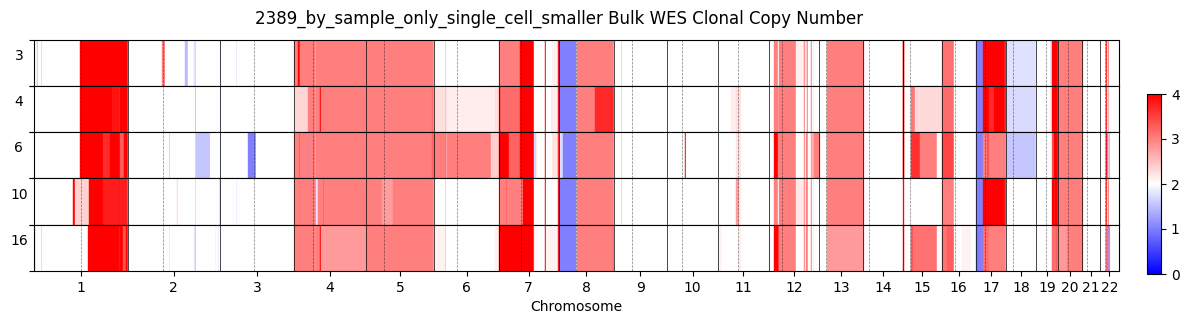

In [91]:
bulk_cn_grid(MGH2389_all_sample_segs,'2389_by_sample_only_single_cell_smaller',figsize = (14,3))

## 1326 by sample

In [77]:
MGH1326_by_sample_segs = os.listdir('by_sample_segs/patient1326/')
MGH1326_by_sample_dfs = []
path='by_sample_segs/patient1326/'

MGH1326_by_sample_segs_in_clone_order = [ '1326_3.tsv', '1326_BWES00001.tsv', '1326_BWES00167.tsv',
                                        '1326_5.tsv', '1326_6.tsv', '1326_10.tsv', '1326_7.tsv', '1326_8.tsv',
                                        '1326_9.tsv', '1326_4.tsv']

MGH1326_by_sample_segs_only_single_cell = [ '1326_3.tsv',  '1326_4.tsv', '1326_6.tsv','1326_8.tsv']

for file in MGH1326_by_sample_segs_only_single_cell:
    df = pd.read_csv(path+file,sep='\t')
    sample_tsv = file.split('_')[1]
    sample_num = sample_tsv.split('.')[0]
    df['total_cn'] = df['A1.Seg.CN'] + df['A2.Seg.CN']
    df['sample'] = [sample_num]*len(df)
    MGH1326_by_sample_dfs.append(df)
    
MGH1326_all_sample_segs = pd.concat(MGH1326_by_sample_dfs)

In [78]:
MGH1326_all_sample_segs

,Chromosome,Start,End,N_probes,Length,A1.Seg.CN,A2.Seg.CN,A1.Sigma,A2.Sigma,total_cn,sample
0,1,12176,94643659,7210,94631483,1.0,1.000000,0.003145,0.003145,2.000000,3
1,1,94645397,104160689,362,9515292,0.0,1.000000,0.031694,0.031694,1.000000,3
2,1,107599965,144363924,1207,36763959,1.0,1.000000,0.007649,0.007649,2.000000,3
3,1,144520739,147131922,514,2611183,1.0,1.000000,0.066541,0.066541,2.000000,3
4,1,147142061,147380734,3,238673,0.0,0.000000,0.126761,0.126761,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...
138,20,54573712,62904764,692,8331052,1.0,1.000000,0.009363,0.009363,2.000000,8
139,21,9907370,48084246,1669,38176876,1.0,1.000000,0.005506,0.005506,2.000000,8
140,22,16157622,20307563,385,4149941,0.0,1.000000,0.008063,0.008063,1.000000,8
141,22,20656702,24325731,443,3669029,0.0,1.176845,0.007912,0.007912,1.176845,8


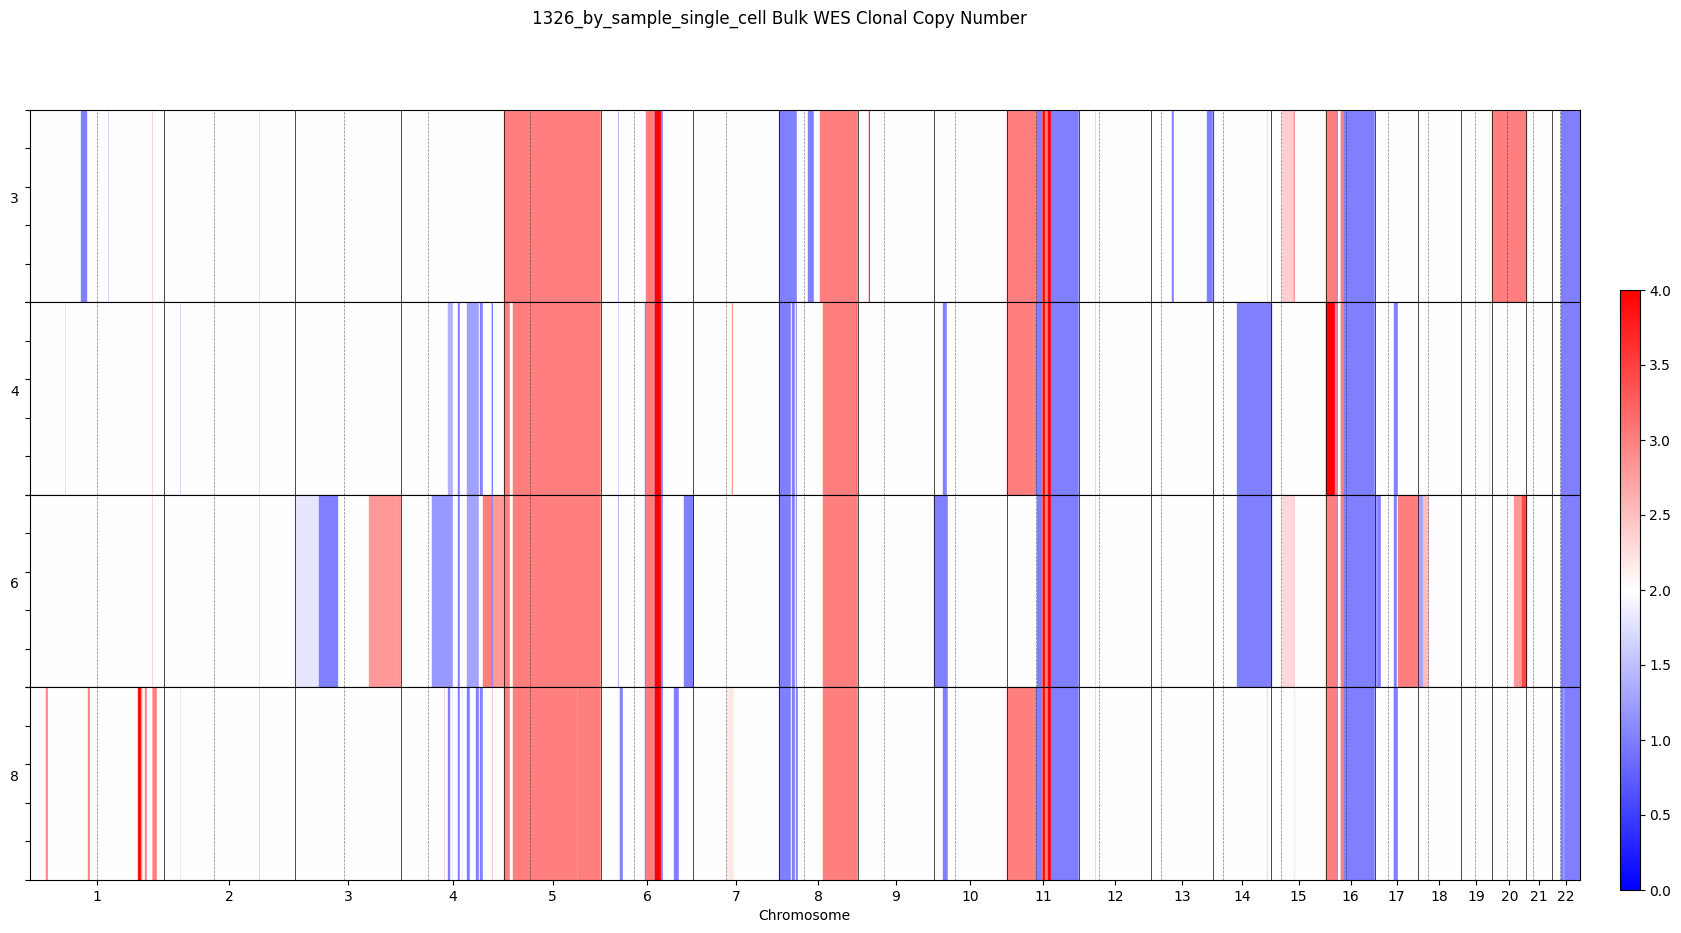

In [79]:
bulk_cn_grid(MGH1326_all_sample_segs,'1326_by_sample_single_cell',figsize = (20,10))

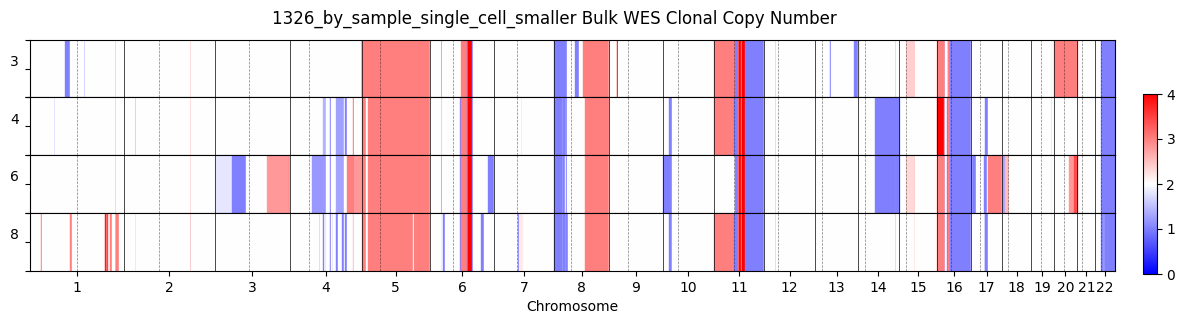

In [88]:
bulk_cn_grid(MGH1326_all_sample_segs,'1326_by_sample_single_cell_smaller',figsize = (14,3))

## 2974 by sample

In [17]:
MGH2974_by_sample_segs = os.listdir('by_sample_segs/patient2974/')
MGH2974_by_sample_dfs = []
path='by_sample_segs/patient2974/'

MGH2974_by_sample_segs_in_clone_order = [ '2974_BWES01976.tsv', '2974_3.tsv', '2974_4.tsv',
                                        '2974_5.tsv', '2974_6.tsv', '2974_7.tsv', '2974_8.tsv', '2974_9.tsv',
                                        '2974_10.tsv', '2974_11.tsv','2974_13.tsv', '2974_14.tsv']

MGH2974_by_sample_segs_only_single_cell = [ '2974_3.tsv',  '2974_9.tsv']

for file in MGH2974_by_sample_segs_in_clone_order:
    df = pd.read_csv(path+file,sep='\t')
    sample_tsv = file.split('_')[1]
    sample_num = sample_tsv.split('.')[0]
    df['total_cn'] = df['A1.Seg.CN'] + df['A2.Seg.CN']
    df['sample'] = [sample_num]*len(df)
    MGH2974_by_sample_dfs.append(df)
    
MGH2974_all_sample_segs = pd.concat(MGH2974_by_sample_dfs)

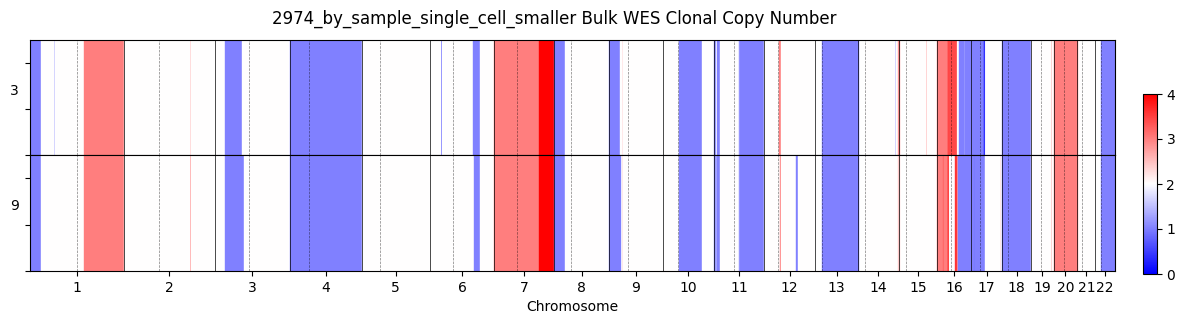

In [15]:
bulk_cn_grid(MGH2974_all_sample_segs,'2974_by_sample_single_cell_smaller',figsize = (14,3))



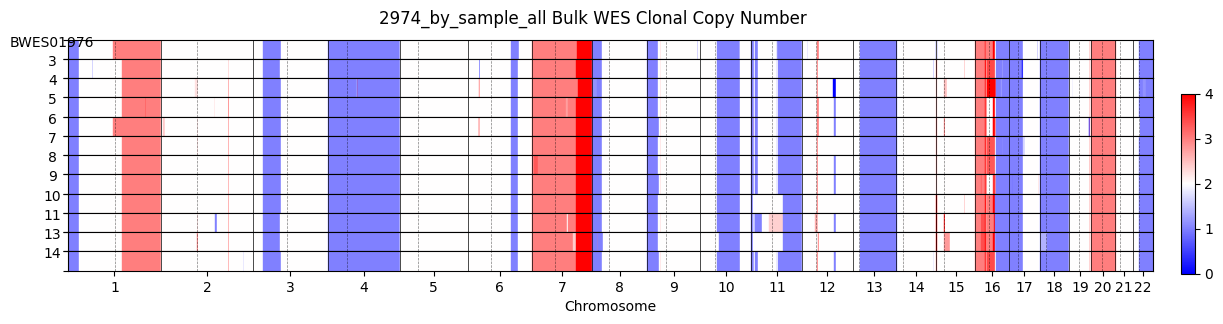

In [18]:
bulk_cn_grid(MGH2974_all_sample_segs,'2974_by_sample_all',figsize = (14,3))

## 1598 by sample

In [24]:
MGH1598_by_sample_segs = os.listdir('by_sample_segs/patient1598/')
MGH1598_by_sample_dfs = []
path='by_sample_segs/patient1598/'

MGH1598_by_sample_segs_in_clone_order = [ '1598_BWES00183.tsv', '1598_BWES00239.tsv','1598_BWES00304.tsv',
                                         '1598_BWES00384.tsv','1598_BWES00445.tsv','1598_BWES00526.tsv',
                                         '1598_BWES00604.tsv','1598_BWES00686.tsv','1598_BWES00766.tsv',
                                         '1598_BWES00858.tsv','1598_BWES00940.tsv',
                                         '1598_1.tsv', '1598_4.tsv', '1598_5.tsv','1598_6.tsv',
                                         '1598_7.tsv','1598_8.tsv','1598_9.tsv','1598_10.tsv',
                                          '1598_11.tsv','1598_12.tsv','1598_13.tsv','1598_14.tsv','1598_15.tsv']

MGH1598_by_sample_segs_only_single_cell = [ '1598_1.tsv',  '1598_5.tsv','1598_7.tsv',
                                          '1598_8.tsv','1598_10.tsv']

for file in MGH1598_by_sample_segs_only_single_cell:
    df = pd.read_csv(path+file,sep='\t')
    sample_tsv = file.split('_')[1]
    sample_num = sample_tsv.split('.')[0]
    df['total_cn'] = df['A1.Seg.CN'] + df['A2.Seg.CN']
    df['sample'] = [sample_num]*len(df)
    MGH1598_by_sample_dfs.append(df)
    
MGH1598_all_sample_segs = pd.concat(MGH1598_by_sample_dfs)

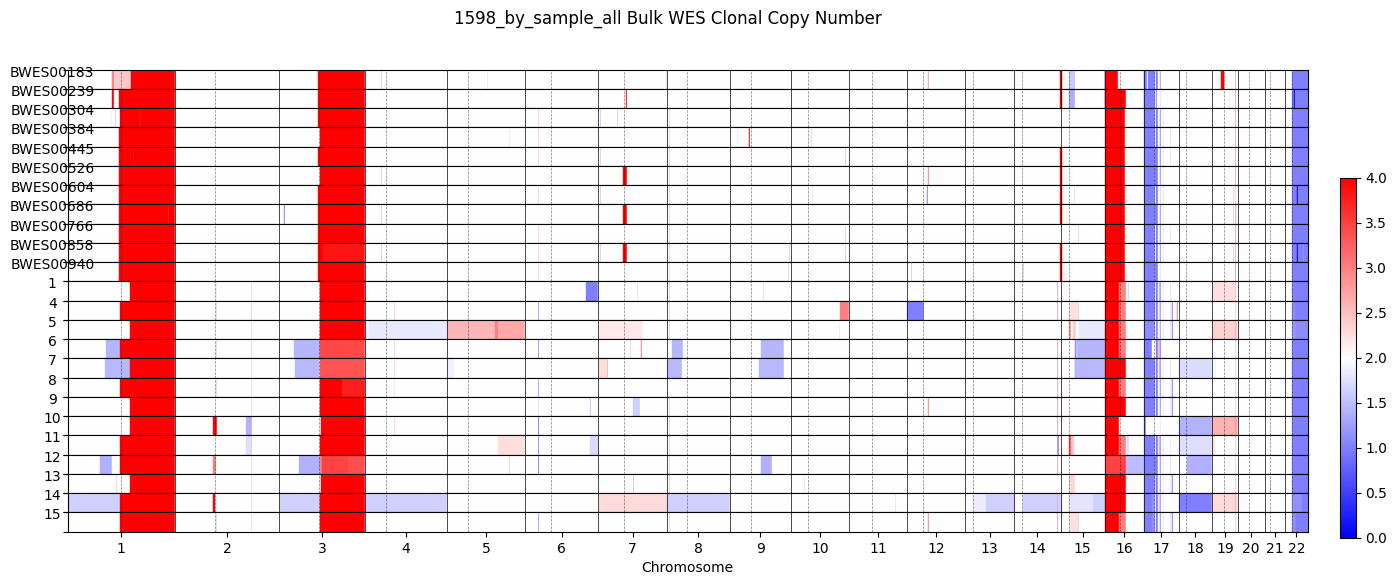

In [22]:
bulk_cn_grid(MGH1598_all_sample_segs,'1598_by_sample_all',figsize = (16,6))

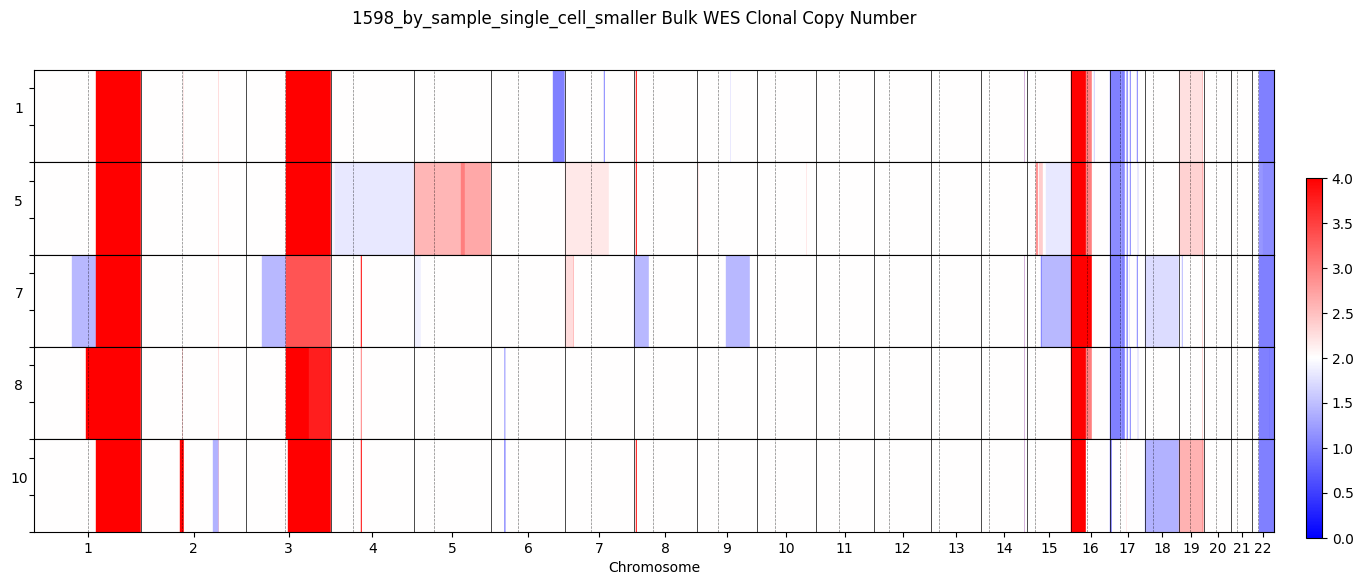

In [25]:
bulk_cn_grid(MGH1598_all_sample_segs,'1598_by_sample_single_cell_smaller',figsize = (16,6))

## last thing: add vertical bar with phylogic cluster color for consistency

In [12]:
def get_hex_string(c):
    return '#{:02X}{:02X}{:02X}'.format(*c)

def get_phylogic_color_scale():
    """Generate dictionary defining phylogic cluster colors."""
    phylogic_color_list = [[166, 17, 129],
                           [39, 140, 24],
                           [103, 200, 243],
                           [248, 139, 16],
                           [16, 49, 41],
                           [93, 119, 254],
                           [152, 22, 26],
                           [104, 236, 172],
                           [249, 142, 135],
                           [55, 18, 48],
                           [83, 82, 22],
                           [247, 36, 36],
                           [0, 79, 114],
                           [243, 65, 132],
                           [60, 185, 179],
                           [185, 177, 243],
                           [139, 34, 67],
                           [178, 41, 186],
                           [58, 146, 231],
                           [130, 159, 21],
                           [161, 91, 243],
                           [131, 61, 17],
                           [248, 75, 81],
                           [32, 75, 32],
                           [45, 109, 116],
                           [255, 169, 199],
                           [55, 179, 113],
                           [34, 42, 3],
                           [56, 121, 166],
                           [172, 60, 15],
                           [115, 76, 204],
                           [21, 61, 73],
                           [67, 21, 74],  # Additional colors, uglier and bad
                           [123, 88, 112],
                           [87, 106, 46],
                           [37, 66, 58],
                           [132, 79, 62],
                           [71, 58, 32],
                           [59, 104, 114],
                           [46, 107, 90],
                           [84, 68, 73],
                           [90, 97, 124],
                           [121, 66, 76],
                           [104, 93, 48],
                           [49, 67, 82],
                           [71, 95, 65],
                           [127, 85, 44],  # even more additional colors, gray
                           [88, 79, 92],
                           [220, 212, 194],
                           [35, 34, 36],
                           [200, 220, 224],
                           [73, 81, 69],
                           [224, 199, 206],
                           [120, 127, 113],
                           [142, 148, 166],
                           [153, 167, 156],
                           [162, 139, 145],
                           [0, 0, 0]]  # black
    colors_dict = {str(i): get_hex_string(c) for i, c in enumerate(phylogic_color_list)}
    return colors_dict

In [13]:

phylo_colors=get_phylogic_color_scale()


In [14]:
phylo_colors[str(0)]

'#A61181'